<a href="https://colab.research.google.com/github/ShravyaMalogi/PROJECT_drafts/blob/main/car-detection/car_detection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
landrykezebou_vcor_vehicle_color_recognition_dataset_path = kagglehub.dataset_download('landrykezebou/vcor-vehicle-color-recognition-dataset')

print('Data source import complete.')

100%|██████████| 574M/574M [00:27<00:00, 21.9MB/s]

Extracting files...


Data source import complete.


In [2]:
import kagglehub

# Download latest version
permanalwep_crowdhuman_crowd_detection_path = kagglehub.dataset_download('permanalwep/crowdhuman-crowd-detection')

print('Data source import complete.')

100%|██████████| 830M/830M [00:41<00:00, 21.1MB/s]

Extracting files...


Data source import complete.


In [3]:
import os

root1 = landrykezebou_vcor_vehicle_color_recognition_dataset_path  # change path accordingly
for root1_dir, dirs, files in os.walk(root1):
    print(f"\n📁 {root1_dir}")
    for file in files[:2]:
        print("   └──", file)


📁 /root/.cache/kagglehub/datasets/landrykezebou/vcor-vehicle-color-recognition-dataset/versions/1

📁 /root/.cache/kagglehub/datasets/landrykezebou/vcor-vehicle-color-recognition-dataset/versions/1/train

📁 /root/.cache/kagglehub/datasets/landrykezebou/vcor-vehicle-color-recognition-dataset/versions/1/train/brown
   └── 1f424aadd2.jpg
   └── 85a4bdc274.jpg

📁 /root/.cache/kagglehub/datasets/landrykezebou/vcor-vehicle-color-recognition-dataset/versions/1/train/yellow
   └── 75d8e3904f.jpg
   └── 156e80518d.jpg

📁 /root/.cache/kagglehub/datasets/landrykezebou/vcor-vehicle-color-recognition-dataset/versions/1/train/silver
   └── ac38d8df26.jpg
   └── 9aeaa8f1e8.jpg

📁 /root/.cache/kagglehub/datasets/landrykezebou/vcor-vehicle-color-recognition-dataset/versions/1/train/red
   └── f5e7aef663.jpg
   └── 0797d93d2d.jpg

📁 /root/.cache/kagglehub/datasets/landrykezebou/vcor-vehicle-color-recognition-dataset/versions/1/train/pink
   └── 16c5ab031e.jpg
   └── 0faccc6f49.jpg

📁 /root/.cache/kaggle

In [4]:
import os

root2 = permanalwep_crowdhuman_crowd_detection_path
for root2_dir, dirs, files in os.walk(root2):
    print(f"\n📁 {root2_dir}")
    for file in files[:5]:
        print("   └──", file)


📁 /root/.cache/kagglehub/datasets/permanalwep/crowdhuman-crowd-detection/versions/5

📁 /root/.cache/kagglehub/datasets/permanalwep/crowdhuman-crowd-detection/versions/5/CrowdHuman Cropped

📁 /root/.cache/kagglehub/datasets/permanalwep/crowdhuman-crowd-detection/versions/5/CrowdHuman Cropped/Dataset CrowdHuman

📁 /root/.cache/kagglehub/datasets/permanalwep/crowdhuman-crowd-detection/versions/5/CrowdHuman Cropped/Dataset CrowdHuman/non crowd
   └── 283992-180c1000aae69c63_jpg.rf.802fb5f198615a925f2c0e279a739b43.jpg
   └── 282555-b0853000f1077e13_jpg.rf.9ad81a607ac7f2c2c7baae3c7872c42f.jpg
   └── 283554-a272000c2036313_jpg.rf.6347e198e64ab725b867c1d279e06dae.jpg
   └── 282555-95e84000256da776_jpg.rf.7ec2ccfe7a344c855fe588c6dfc59a7a.jpg
   └── 273278-b9dee0007ea26306_jpg.rf.61fbf4f1594f2206fbd4b093747a8a34.jpg

📁 /root/.cache/kagglehub/datasets/permanalwep/crowdhuman-crowd-detection/versions/5/CrowdHuman Cropped/Dataset CrowdHuman/crowd
   └── 273275-933c0006ac04cc6_jpg.rf.d6d857290b695b7

# Preprocessing + Visualization

Loading from /root/.cache/kagglehub/datasets/landrykezebou/vcor-vehicle-color-recognition-dataset/versions/1/train/blue: 100%|██████████| 742/742 [00:03<00:00, 242.83it/s]
Loading from /root/.cache/kagglehub/datasets/landrykezebou/vcor-vehicle-color-recognition-dataset/versions/1/val/grey: 100%|██████████| 91/91 [00:00<00:00, 381.32it/s]
Loading from /root/.cache/kagglehub/datasets/permanalwep/crowdhuman-crowd-detection/versions/5/CrowdHuman Cropped/Dataset CrowdHuman/crowd: 100%|██████████| 7499/7499 [01:15<00:00, 99.89it/s]
Loading from /root/.cache/kagglehub/datasets/permanalwep/crowdhuman-crowd-detection/versions/5/CrowdHuman Cropped/Dataset CrowdHuman/non crowd: 100%|██████████| 7499/7499 [00:19<00:00, 392.28it/s]


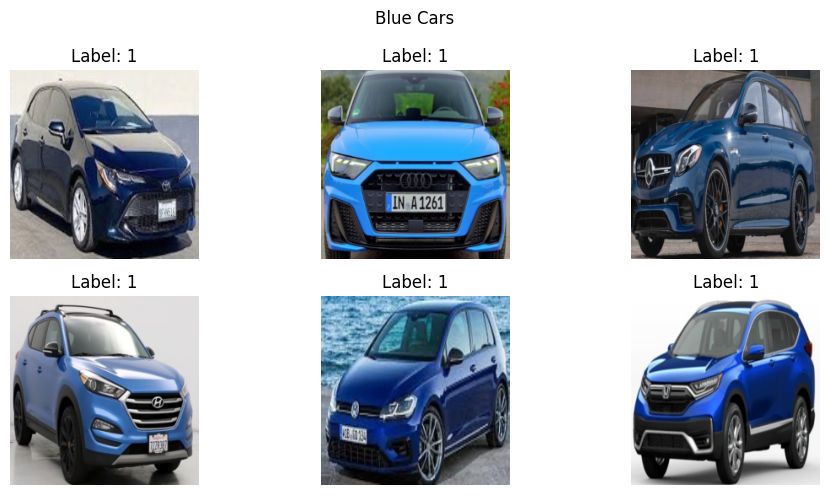

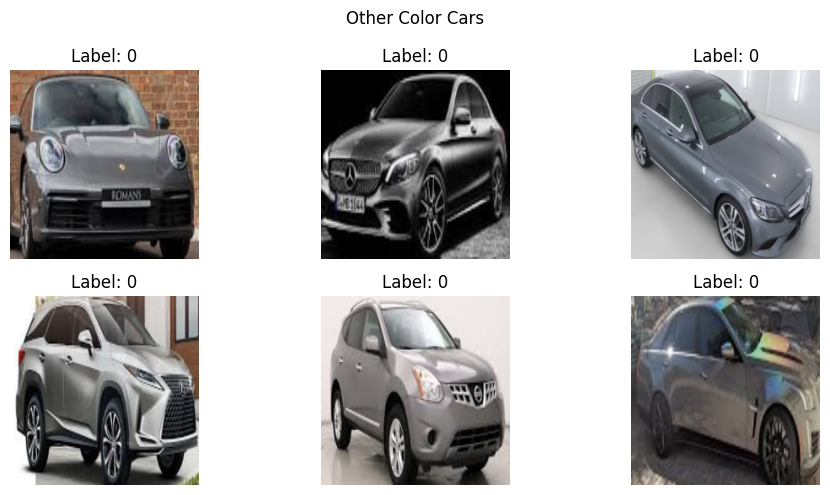

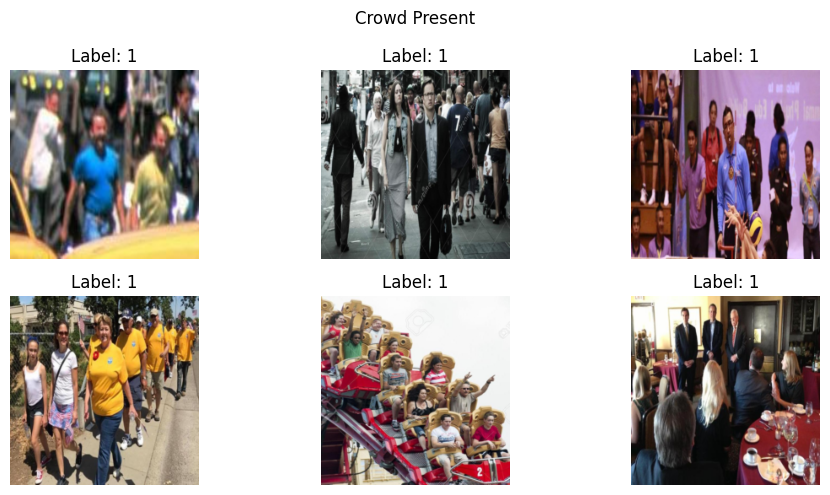

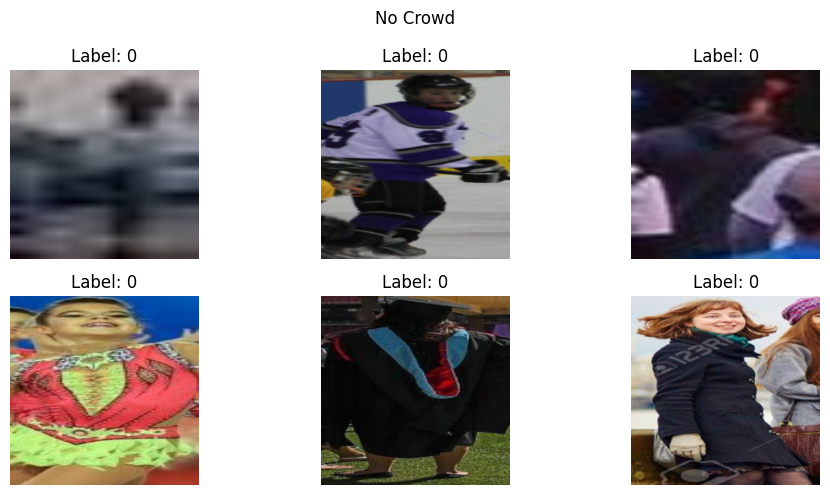

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from tqdm import tqdm

# ===============================
# 🔧 1. IMAGE TRANSFORMATION SETUP
# ===============================
transform = transforms.Compose([
    transforms.Resize((224, 224)),     # Resize to standard shape
    transforms.ToTensor(),             # Convert to tensor
])

# ============================================
# 📂 2. FUNCTION TO LOAD & PREPROCESS IMAGES
# ============================================
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in tqdm(os.listdir(folder), desc=f"Loading from {folder}"):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder, filename)
            try:
                img = Image.open(img_path).convert('RGB')
                img_tensor = transform(img)
                images.append(img_tensor)
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {filename}: {e}")
    return images, labels

# ================================================
# 🧭 3. PATH SETUP — CHANGE THESE TO YOUR FOLDERS
# ================================================
car_blue_path = "/root/.cache/kagglehub/datasets/landrykezebou/vcor-vehicle-color-recognition-dataset/versions/1/train/blue"
car_other_path = "/root/.cache/kagglehub/datasets/landrykezebou/vcor-vehicle-color-recognition-dataset/versions/1/val/grey"
crowd_path = "/root/.cache/kagglehub/datasets/permanalwep/crowdhuman-crowd-detection/versions/5/CrowdHuman Cropped/Dataset CrowdHuman/crowd"
non_crowd_path = "/root/.cache/kagglehub/datasets/permanalwep/crowdhuman-crowd-detection/versions/5/CrowdHuman Cropped/Dataset CrowdHuman/non crowd"

# ======================================================
# 📥 4. LOAD DATA (with labels: 1 = yes, 0 = no)
# ======================================================
car_blue_images, car_blue_labels = load_images_from_folder(car_blue_path, 1)
car_other_images, car_other_labels = load_images_from_folder(car_other_path, 0)

crowd_images, crowd_labels = load_images_from_folder(crowd_path, 1)
non_crowd_images, non_crowd_labels = load_images_from_folder(non_crowd_path, 0)

# ========================================
# 👁️ 5. VISUALIZATION FUNCTION
# ========================================
def show_samples(images, labels, title):
    plt.figure(figsize=(10, 5))
    for i in range(min(6, len(images))):
        plt.subplot(2, 3, i + 1)
        img = images[i].permute(1, 2, 0).numpy()
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Label: {labels[i]}')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# ========================================
# 🖼️ 6. SHOW EXAMPLES FROM EACH CATEGORY
# ========================================
show_samples(car_blue_images, car_blue_labels, "Blue Cars")
show_samples(car_other_images, car_other_labels, "Other Color Cars")
show_samples(crowd_images, crowd_labels, "Crowd Present")
show_samples(non_crowd_images, non_crowd_labels, "No Crowd")

# Code

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
# Set up directories (adjust if needed)
BASE_DIR = "/root/.cache/kagglehub/datasets/landrykezebou/vcor-vehicle-color-recognition-dataset/versions/1"  # This should contain train/, val/, test/
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [9]:
# Image augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    os.path.join(BASE_DIR, "train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(BASE_DIR, "val"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 7267 images belonging to 15 classes.
Found 1550 images belonging to 15 classes.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Simple CNN architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,171,791 (42.62 MB)

 Trainable params: 11,171,343 (42.62 MB)

 Non-trainable params: 448 (1.75 KB)

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# Callback to reduce learning rate when validation accuracy plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

# Save the best model based on validation accuracy
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/best_car_color_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Train the model with callbacks
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[reduce_lr, checkpoint]
)

Epoch 1/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 0.3038 - loss: 4.4591
Epoch 1: val_accuracy improved from -inf to 0.11935, saving model to /content/drive/MyDrive/best_car_color_model.keras
228/228 ━━━━━━━━━━━━━━━━━━━━ 117s 515ms/step - accuracy: 0.3039 - loss: 4.4521 - val_accuracy: 0.1194 - val_loss: 7.2339 - learning_rate: 0.0010
Epoch 2/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.3312 - loss: 2.1512
Epoch 2: val_accuracy improved from 0.11935 to 0.41613, saving model to /content/drive/MyDrive/best_car_color_model.keras
228/228 ━━━━━━━━━━━━━━━━━━━━ 129s 457ms/step - accuracy: 0.3314 - loss: 2.1508 - val_accuracy: 0.4161 - val_loss: 1.9624 - learning_rate: 0.0010
Epoch 3/10
227/228 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.3616 - loss: 1.9991
Epoch 3: val_accuracy improved from 0.41613 to 0.49742, saving model to /content/drive/MyDrive/best_car_color_model.keras
228/228 ━━━━━━━━━━━━━━━━━━━━ 109s 478ms/step - accuracy: 0.3616 - loss: 1.9995 - va

In [18]:
from tensorflow.keras.models import load_model

# Load your best saved model
model = load_model("/content/drive/MyDrive/best_car_color_model.keras")

# Continue training from epoch 11
history2 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,             # new total epochs
    initial_epoch=10,      # start counting from where you left off
    callbacks=[reduce_lr, checkpoint]  # reuse your callbacks
)

Epoch 11/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.4418 - loss: 1.6263
Epoch 11: val_accuracy did not improve from 0.57355
228/228 ━━━━━━━━━━━━━━━━━━━━ 125s 507ms/step - accuracy: 0.4417 - loss: 1.6266 - val_accuracy: 0.5232 - val_loss: 2.3107 - learning_rate: 0.0010
Epoch 12/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.4343 - loss: 1.6088
Epoch 12: val_accuracy did not improve from 0.57355
228/228 ━━━━━━━━━━━━━━━━━━━━ 108s 475ms/step - accuracy: 0.4343 - loss: 1.6088 - val_accuracy: 0.5303 - val_loss: 2.2467 - learning_rate: 0.0010
Epoch 13/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - accuracy: 0.4404 - loss: 1.5648
Epoch 13: val_accuracy improved from 0.57355 to 0.60645, saving model to /content/drive/MyDrive/best_car_color_model.keras
228/228 ━━━━━━━━━━━━━━━━━━━━ 109s 480ms/step - accuracy: 0.4405 - loss: 1.5648 - val_accuracy: 0.6065 - val_loss: 1.1583 - learning_rate: 0.0010
Epoch 14/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.47

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Path to your test folder
test_dir = "/root/.cache/kagglehub/datasets/landrykezebou/vcor-vehicle-color-recognition-dataset/versions/1/test"  # change this to your actual test folder

# Load the best saved model from Google Drive
model_path = "/content/drive/MyDrive/best_car_color_model.keras"
model = load_model(model_path)

# Test data generator (no augmentation, just rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # match your training size
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator, verbose=1)

print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Optional: See predictions vs labels
import numpy as np
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)

from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))

Found 1556 images belonging to 15 classes.
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.6520 - loss: 1.1463
Test Accuracy: 0.6542
Test Loss: 1.2501
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step

Classification Report:
               precision    recall  f1-score   support

       beige       0.38      0.23      0.29        90
       black       0.48      0.90      0.63        87
        blue       0.88      0.94      0.91       159
       brown       0.43      0.79      0.55       121
        gold       0.19      0.18      0.18        45
       green       0.80      0.96      0.87       121
        grey       0.46      0.07      0.11        92
      orange       0.73      0.85      0.79       114
        pink       0.90      0.71      0.79       103
      purple       0.98      0.76      0.85       115
         red       0.83      0.77      0.80       136
      silver       0.43      0.04      0.07        77
         tan       0.00      0.00      0.00        86
       white       0